In [ ]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

In [106]:
def custom_plots(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.grid(False)
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')

In [ ]:
src = "./criteria/"

# get list of files with "replies_coeffs" and "replies_first_coeffs"
replies_files = [f for f in listdir(src) if isfile(join(src, f)) and "replies_coeffs" in f]
first_files = [f for f in listdir(src) if isfile(join(src, f)) and "replies_first_coeffs" in f]

coeffs_dtypes = {
    "Coefficient": float, 
    "CI_Lower": float, 
    "CI_Upper": float
}

In [ ]:
def read_files(files):
    dfs = []
    for f in files:
        file_name = f.split(".")[0].split("_")[2] 
        df = pd.read_csv(join(src, f), dtype=coeffs_dtypes)  
        df["Criteria"] = file_name 
        df["Emotion"] = df["DV"].str.replace("_avg", "")
        dfs.append(df)  
    return pd.concat(dfs, ignore_index=True)  

replies_crit = read_files(replies_files)
first_crit = read_files(first_files)
replies_crit.head(3)

,DV,Coefficient,SE,CI_Lower,CI_Upper,P-Value,R-Squared,Criteria,Emotion
0,Anger_avg,0.035197,0.002517,0.030263,0.040131,2.277283e-44,0.016033,Does not repeatedly publish false content,Anger
1,Disgust_avg,0.003957,0.000599,0.002784,0.005130,3.857137e-11,0.005794,Does not repeatedly publish false content,Disgust
2,Fear_avg,0.002611,0.000542,0.001549,0.003674,1.462548e-06,0.005988,Does not repeatedly publish false content,Fear


In [ ]:
def read_main_coeffs(path):
    df = pd.read_csv(path, dtype=coeffs_dtypes)
    df["Criteria"] = "Rating"
    df["Emotion"] = df["DV"].str.replace("_avg", "")
    return df

main_reply_coeffs = read_main_coeffs(src, "../replies/replies_coeffs.csv")
main_first_coeffs = read_main_coeffs(src, "../replies/replies_first_coeffs.csv")
main_reply_coeffs

,DV,Coefficient,SE,CI_Lower,CI_Upper,P-Value,R-Squared,Cond_Mean,Criteria,Emotion
0,Anger_avg,0.031317,0.002430,0.026554,0.036080,5.815870e-38,0.015518,0.368617,Rating,Anger
1,Disgust_avg,0.003587,0.000577,0.002455,0.004719,5.276182e-10,0.005646,0.017184,Rating,Disgust
2,Fear_avg,0.001849,0.000524,0.000821,0.002877,4.217461e-04,0.005749,0.015027,Rating,Fear
3,Sadness_avg,0.000925,0.000577,-0.000206,0.002056,1.090847e-01,0.013280,0.017627,Rating,Sadness
4,Joy_avg,-0.003610,0.000866,-0.005309,-0.001912,3.090951e-05,0.008083,0.032021,Rating,Joy
5,Pride_avg,-0.000320,0.000262,-0.000833,0.000192,2.207289e-01,0.001329,0.005271,Rating,Pride
6,Hope_avg,-0.000084,0.000366,-0.000801,0.000634,8.190338e-01,0.001570,0.007488,Rating,Hope


In [110]:
replies_coeffs = pd.concat([
            main_reply_coeffs, replies_crit], 
            ignore_index=True)

first_coeffs = pd.concat([
            main_first_coeffs, first_crit], 
            ignore_index=True)

replies_coeffs.head(3)

,DV,Coefficient,SE,CI_Lower,CI_Upper,P-Value,R-Squared,Cond_Mean,Criteria,Emotion
0,Anger_avg,0.031317,0.002430,0.026554,0.036080,5.815870e-38,0.015518,0.368617,Rating,Anger
1,Disgust_avg,0.003587,0.000577,0.002455,0.004719,5.276182e-10,0.005646,0.017184,Rating,Disgust
2,Fear_avg,0.001849,0.000524,0.000821,0.002877,4.217461e-04,0.005749,0.015027,Rating,Fear


In [ ]:
# shorten names of criteria
for df in [replies_coeffs, first_coeffs]:
    df["Criteria"] = df["Criteria"].replace({
        "Rating": "Trustworthiness",
        "Clearly labels advertising": "Labels advertising",
        "The site provides names of content creators, along with either contact or biographical information": "Provides creator names",
        "Website discloses ownership and financing": "Discloses ownership",
        "Reveals who's in charge, including any possible conflicts of interest": "Reveals who's in charge",
        "Does not repeatedly publish false content": "Does not publish\n false content",
        "Regularly corrects or clarifies errors": "Corrects errors",
        "Handles the difference between news and opinion responsibly": "News vs opinion",
        "Gathers and presents information responsibly": "Presents information\n responsibly",
    })

In [112]:
criteria = replies_coeffs["Criteria"].unique()
len(criteria)

10

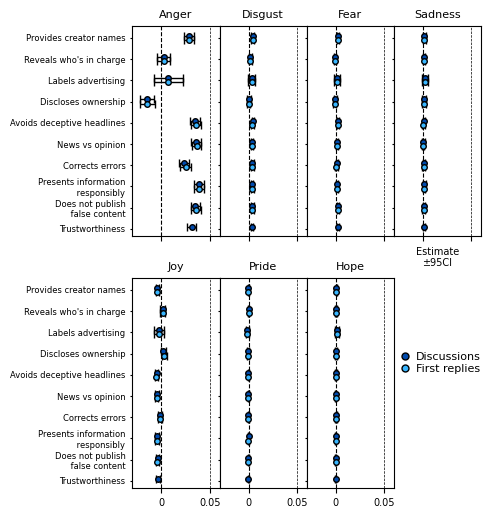

In [ ]:
fig, axes = plt.subplots(2, 4, 
                         figsize=(4.5, 6), 
                         sharex=True, 
                         sharey=True,
                         gridspec_kw={"wspace": 0})

axes = axes.flatten() 


emotion_list = replies_coeffs["Emotion"].unique()


criteria_list = replies_coeffs["Criteria"].unique()
criteria_positions = {crit: i for i, crit in enumerate(criteria_list)}  
replies_coeffs["Criteria_Pos"] = replies_coeffs["Criteria"].map(criteria_positions)
first_coeffs["Criteria_Pos"] = replies_coeffs["Criteria"].map(criteria_positions)


df_colormap = {
    "Discussions": "#004aad",
    "First replies": "#38b6ff",
}

for i, emotion in enumerate(emotion_list):

    ax = axes[i]
    replies_data = replies_coeffs[replies_coeffs["Emotion"] == emotion]
    first_data = first_coeffs[first_coeffs["Emotion"] == emotion]
    
    dodge_offset = 0.1
    ax.errorbar(replies_data["Coefficient"],
                replies_data["Criteria_Pos"] + dodge_offset,
                xerr=[replies_data["Coefficient"] - replies_data["CI_Lower"],
                      replies_data["CI_Upper"] - replies_data["Coefficient"]],
                fmt="o", color=df_colormap["Discussions"],
                ecolor="black", markeredgecolor="black",
                markersize=4, elinewidth=1, capsize=3,
                label="Discussions")
    
    ax.errorbar(first_data["Coefficient"],
                first_data["Criteria_Pos"] - dodge_offset,
                xerr=[first_data["Coefficient"] - first_data["CI_Lower"],
                      first_data["CI_Upper"] - first_data["Coefficient"]],
                fmt="o", color=df_colormap["First replies"],
                ecolor="black", markeredgecolor="black",
                markersize=4, elinewidth=1, capsize=3,
                label="First replies")
    
    ax.axvline(0, color="black", linestyle="--", linewidth=0.8)
    ax.axvline(0.05, color="black", linestyle="--", linewidth=0.5)
    ax.set_title(emotion, fontsize=8)

    ax.set_yticks(list(criteria_positions.values()))
    
    ax.tick_params(axis='y', length=1.5)
    if i == 0 or i == 4:
        ax.tick_params(axis='y', labelsize=6)
        ax.set_yticklabels(criteria_list, fontsize=6)

    # Add x-axis label for the center plot (optional)
    if i == 3:
        ax.set_xlabel("Estimate\n±95CI", fontsize=7)

    ax.set_xticks([0, 0.05])
    ax.set_xlim(-0.03, 0.06)
    ax.set_xticklabels(["0", "0.05"], fontsize=7)




discussions_marker = mlines.Line2D([], [], 
                    color=df_colormap["Discussions"], 
                    marker='o', markersize=5, 
                    markeredgecolor="black", 
                    linestyle="None", 
                    label="Discussions")
first_replies_marker = mlines.Line2D([], [], 
                color=df_colormap["First replies"], marker='o', 
                markersize=5, markeredgecolor="black", 
                linestyle="None", label="First replies")

fig.legend(handles=[discussions_marker, first_replies_marker],
           loc="lower right", fontsize=8, 
              bbox_to_anchor=(0.9, 0.3),
            handletextpad=0,
            borderpad=0,
            labelspacing=0.2,
            borderaxespad=0,
           frameon=False, ncol=1)

if len(emotion_list) < len(axes):
    for j in range(len(emotion_list), len(axes)):
        axes[j].axis("off")

plt.show()

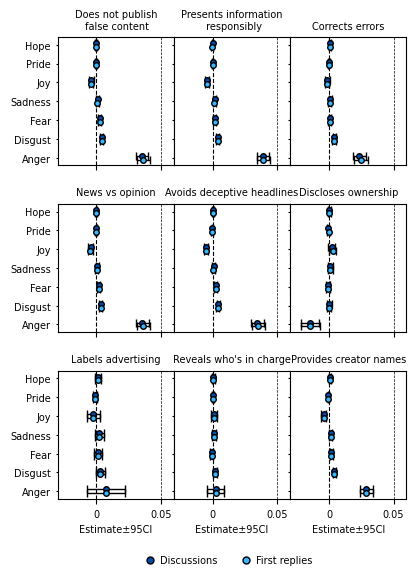

In [ ]:
fig, axes = plt.subplots(3, 3, 
                         figsize=(4.5, 6), 
                         sharex=True, 
                         sharey=True,
                         gridspec_kw={"hspace": 0.3, 
                                      "wspace": 0})

axes = axes.flatten() 


emotion_list = replies_coeffs["Emotion"].unique()


criteria_list = replies_coeffs["Criteria"].unique()
# remove Trustworthiness from criteria_list
criteria_list = criteria_list[criteria_list != "Trustworthiness"]
emotion_positions = {emo: i for i, emo in enumerate(emotion_list)}  
replies_coeffs["Emo_Pos"] = replies_coeffs["Emotion"].map(emotion_positions)
first_coeffs["Emo_Pos"] = replies_coeffs["Emotion"].map(emotion_positions)


df_colormap = {
    "Discussions": "#004aad",
    "First replies": "#38b6ff",
}

for i, crit in enumerate(criteria_list):

    ax = axes[i]
    replies_data = replies_coeffs[replies_coeffs["Criteria"] == crit]
    first_data = first_coeffs[first_coeffs["Criteria"] == crit]
    
    dodge_offset = 0.1
    ax.errorbar(replies_data["Coefficient"],
                replies_data["Emo_Pos"] + dodge_offset,
                xerr=[replies_data["Coefficient"] - replies_data["CI_Lower"],
                      replies_data["CI_Upper"] - replies_data["Coefficient"]],
                fmt="o", color=df_colormap["Discussions"],
                ecolor="black", markeredgecolor="black",
                markersize=4, elinewidth=1, capsize=3,
                label="Discussions")
    
    ax.errorbar(first_data["Coefficient"],
                first_data["Emo_Pos"] - dodge_offset,
                xerr=[first_data["Coefficient"] - first_data["CI_Lower"],
                      first_data["CI_Upper"] - first_data["Coefficient"]],
                fmt="o", color=df_colormap["First replies"],
                ecolor="black", markeredgecolor="black",
                markersize=4, elinewidth=1, capsize=3,
                label="First replies")
    
    ax.axvline(0, color="black", linestyle="--", linewidth=0.8)
    ax.axvline(0.05, color="black", linestyle="--", linewidth=0.5)
    ax.set_title(crit, fontsize=7)

    ax.set_yticks(list(emotion_positions.values()))
    
    ax.tick_params(axis='y', length=1.5)
    if i == 0 or i == 3 or i == 6:
        ax.tick_params(axis='y', labelsize=7)
        ax.set_yticklabels(emotion_list, fontsize=7)

    if i >= 6:
        ax.set_xlabel("Estimate±95CI", fontsize=7)
    else:
        ax.set_xlabel("", fontsize=7)
    ax.set_xticks([0, 0.05])
    ax.set_xlim(-0.03, 0.06)
    ax.set_xticklabels(["0", "0.05"], fontsize=7)

discussions_marker = mlines.Line2D([], [], 
                    color=df_colormap["Discussions"], 
                    marker='o', markersize=5, 
                    markeredgecolor="black", 
                    linestyle="None", 
                    label="Discussions")
first_replies_marker = mlines.Line2D([], [], 
                color=df_colormap["First replies"], marker='o', 
                markersize=5, markeredgecolor="black", 
                linestyle="None", label="First replies")

fig.legend(handles=[discussions_marker, first_replies_marker],
           loc="lower center", fontsize=7, 
              bbox_to_anchor=(0.5, 0),
            handletextpad=0,
            borderpad=0,
            labelspacing=0.2,
            borderaxespad=0,
           frameon=False, ncol=2)

if len(criteria_list) < len(axes):
    for j in range(len(criteria_list), len(axes)):
        axes[j].axis("off")

plt.savefig(join(src, "criteria_analysis.pdf"), dpi=300, bbox_inches="tight")
plt.show()